In [27]:
pip install plotnine



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


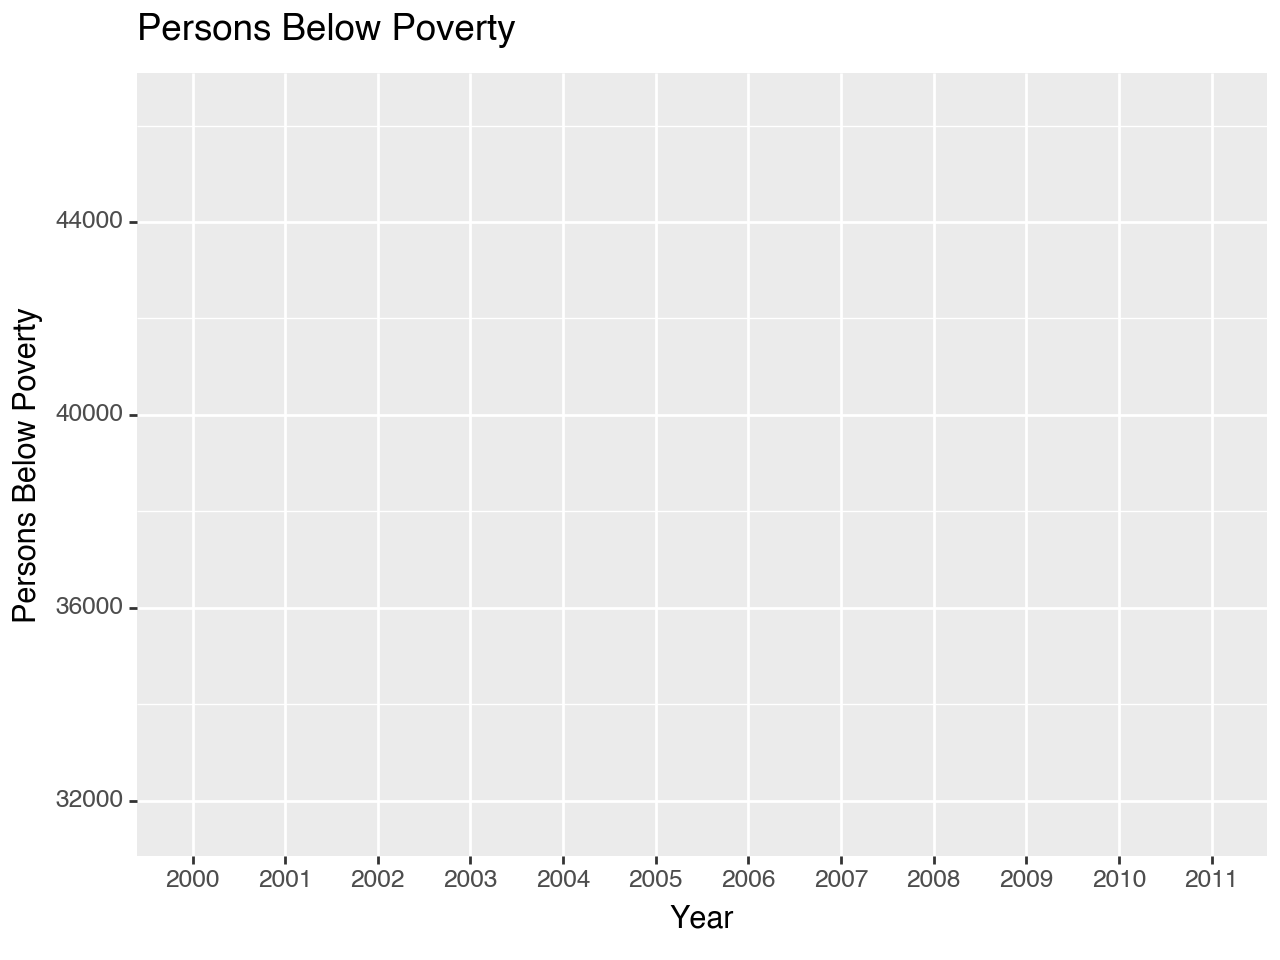

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


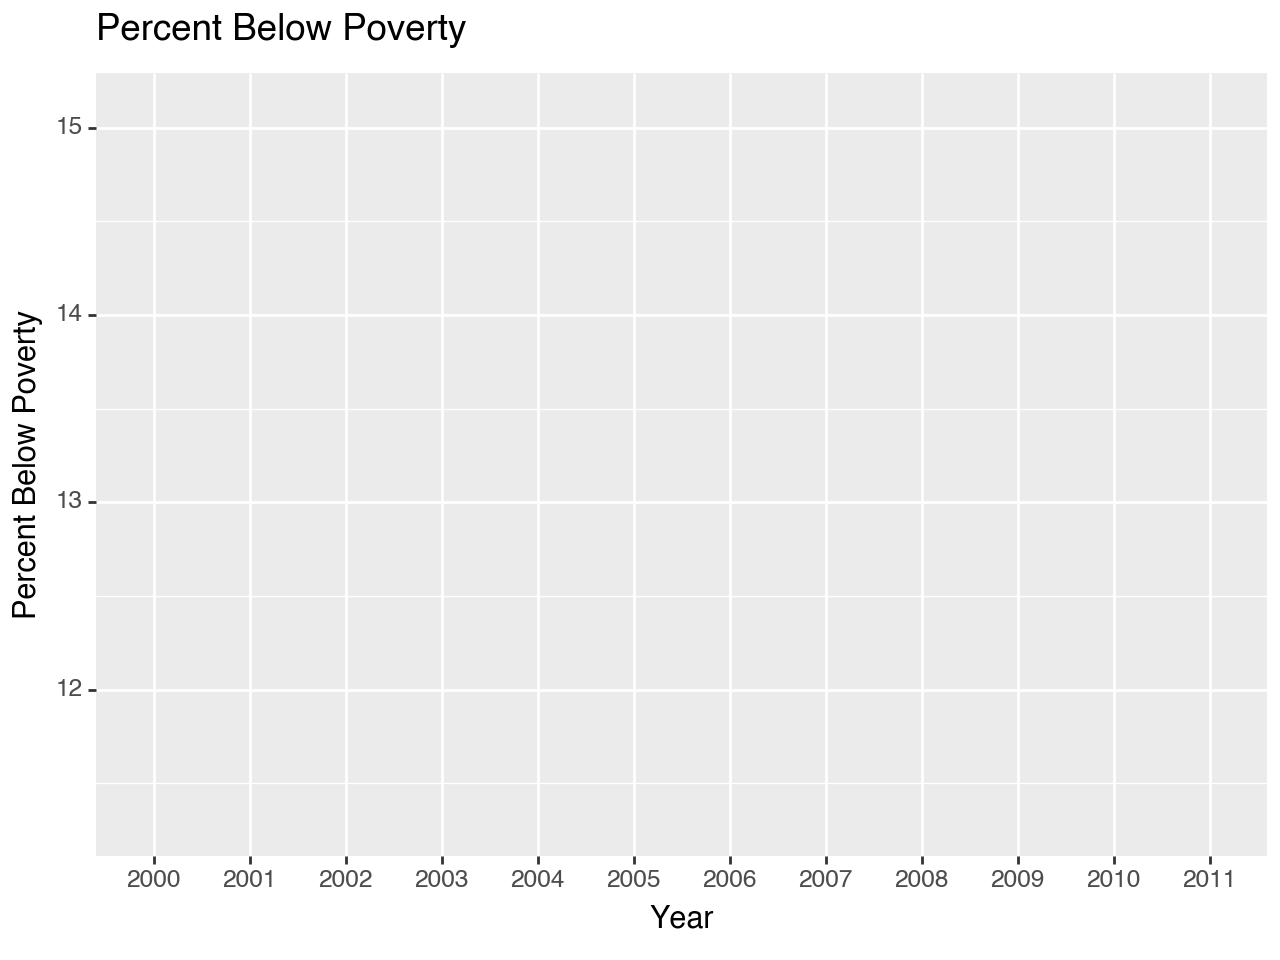

In [28]:
import requests
import re
import pandas as pd

url = "https://aspe.hhs.gov/information-poverty-income-statistics-tables"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Use regular expressions to find the first table
    match = re.search(r'<table.*?>(.*?)</table>', response.text, re.DOTALL)

    # Check if a table was found
    if match:
        table_html = match.group(1)

        # Extract and store the table content in a list of lists
        rows = re.findall(r'<tr.*?>(.*?)</tr>', table_html, re.DOTALL)
        data_list = []
        for row in rows:
            columns = re.findall(r'<t[dh].*?>(.*?)</t[dh]>', row, re.DOTALL)
            data = [re.sub(r'<.*?>', '', col).strip() for col in columns]
            data_list.append(data)

        # Create a DataFrame from the list of lists
        df = pd.DataFrame(data_list, columns=["Year", "Persons Below Poverty", "Percent Below Poverty"])

        # Filter out rows where the "Year" column doesn't start with numbers
        df = df[df["Year"].str.match(r'^\d{4}', na=False)]

        # Extract only the first four characters from the "Year" column
        df["Year"] = df["Year"].str[:4]

        # Remove commas and convert columns to numeric
        df["Persons Below Poverty"] = pd.to_numeric(df["Persons Below Poverty"].str.replace(',', ''), errors='coerce')
        df["Percent Below Poverty"] = pd.to_numeric(df["Percent Below Poverty"].str.replace(',', ''), errors='coerce')

        # Plotting
        plot_persons_below_poverty = (
            ggplot(df, aes(x='Year', y='Persons Below Poverty'))
            + geom_line()
            + labs(title='Persons Below Poverty', x='Year', y='Persons Below Poverty')
        )

        plot_percent_below_poverty = (
            ggplot(df, aes(x='Year', y='Percent Below Poverty'))
            + geom_line()
            + labs(title='Percent Below Poverty', x='Year', y='Percent Below Poverty')
        )

        # Show the plots
        print(plot_persons_below_poverty)
        print(plot_percent_below_poverty)

    else:
        print("No table found on the page.")

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


In [30]:
pip install altair



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import altair as alt
import pandas as pd

# Assuming you have already loaded the DataFrame 'df'

# Altair Line Chart with Tooltip
line_chart = alt.Chart(df).mark_line().encode(
    x='Year:T',
    y=alt.Y('Percent Below Poverty:Q', title='Percent Below Poverty'),
    tooltip=['Year:T', alt.Tooltip('Percent Below Poverty:Q', title='Percent Below Poverty')]
).properties(
    title='Percent Below Poverty in the USA from 2000-2011'
)

# Show the interactive line chart
line_chart.interactive()


alt.Chart(...)

In [53]:
import altair as alt
import pandas as pd

# Assuming you have already loaded the DataFrame 'df'

# Altair Line Chart with Tooltip
line_chart = alt.Chart(df).mark_line().encode(
    x='Year:T',
    y=alt.Y('Persons Below Poverty:Q', title='Percent Below Poverty'),
    tooltip=['Year:T', alt.Tooltip('Persons Below Poverty:Q', title='Persons Below Poverty')]
).properties(
    title='Persons Below Poverty in the USA from 2000-2011'
)

# Show the interactive line chart
line_chart.interactive()

alt.Chart(...)

In [54]:
df.to_csv('poverty.csv', index=False)